                                             MVA - MCMC
                                             TP5 - Sampling from multimodal distributions
                                        Achari Berrada Youssef 

# Exercice 1: A toy example: 

The target distribution is: 

$$ \pi(x) = \sum_{i=1}^{20} \frac{w_i}{2\pi \sigma_i^2} \exp\left( -\frac{1}{2\sigma_i^2} (x-\mu_i)^T (x-\mu_i) \right) $$

In [475]:
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import re 
from scipy.stats import multivariate_normal as mn 
import pandas as pd

In [403]:
# Define the center of the gausian 
mu = np.zeros([20,2])
mu[0] = [2.18,5.76]
mu[1] = [8.67,9.59]
mu[2] = [4.24,8.48]
mu[3] = [8.41,1.68]
mu[4] = [3.93,8.82]
mu[5] = [3.25,3.47]
mu[6] = [1.70,0.50]
mu[7] = [4.59,5.60]
mu[8] = [6.91,5.81]
mu[9] = [6.87,5.40]
mu[10] = [5.41,2.65]
mu[11] = [2.70,7.88]
mu[12] = [4.98,3.70]
mu[13] = [1.14,2.39]
mu[14] = [8.33,9.50]
mu[15] = [4.93,1.50]
mu[16] = [1.83,0.09]
mu[17] = [2.26,0.31]
mu[18] = [5.54,6.86]
mu[19] = [1.69,8.11]

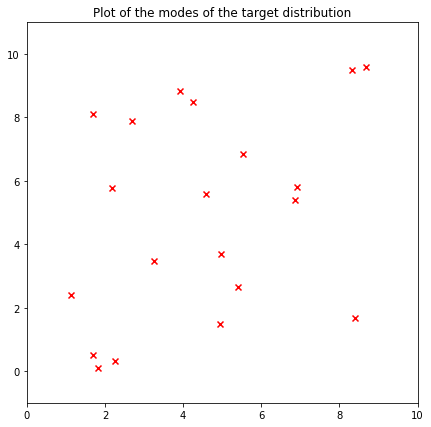

In [818]:
plt.figure(figsize=(7,7))
plt.scatter(mu[:,0],mu[:,1], marker='x',color='red') ;
plt.title('Plot of the modes of the target distribution');
plt.axis([0,10,-1,11]);

In [814]:
def target_pi(x,mu,var=0.01,T= 1): 
    # Function to compute the target density evaluated in x (Can be a tensor but last dimension must be 2): 
    """
        mu  : is the centroids of the gaussian mixtures 
        Var : is the fixed variance 
        T   : is the temperature of the distribution needed for PT and EES samplers 
    """
    res = 0 
    Id = np.eye(2)
    d = mu.shape[0]
    for i in range(d): 
        res += 0.05 *  mn.pdf(x,mean = mu[i],cov = var*Id)
    return res**(1/T)

In [815]:
## Define the meshgrid 
xlist = np.linspace(0,10,1000)
ylist = np.linspace(-1,11,1000)
X,Y = np.meshgrid(xlist, ylist)
## Define the levels 
levels = np.arange(0,1,0.2)

In [816]:
Z = np.zeros((X.shape[0],X.shape[1],2))
Z[:,:,0] = X
Z[:,:,1] = Y
## Plot Target distribution 
Z = target_pi(Z,mu)

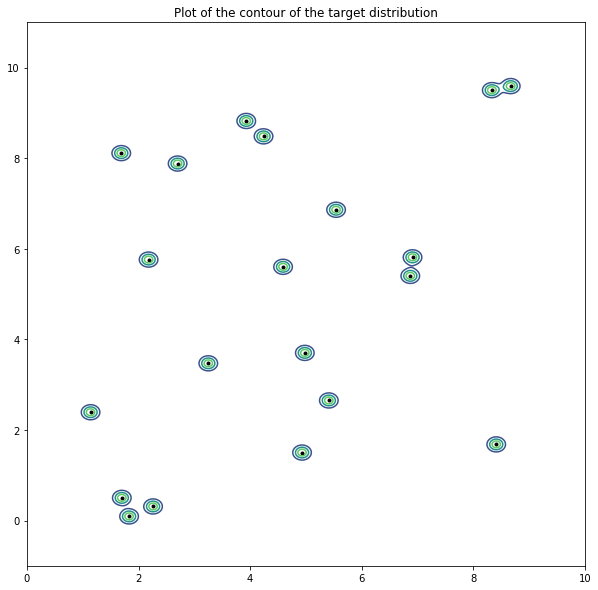

In [817]:
plt.figure(figsize=(10,10))
plt.contour(X,Y,Z,levels); 
plt.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
plt.title('Plot of the contour of the target distribution');
plt.axis([0,10,-1,11]);

#### Implementation of the Metropolis-Hastings Symmetric Random Walk Algorithm:

In [612]:
def g_srwmh(x_0,y_0,sigma,mu,NIter,T=1.0): 
    # Gaussian-Symmetric Random Walk Metropolis-Hasting algorithm
    # Function to sample from pi using the Metropolis Hasting Symmetric Random Walk algorithm 
    """
        sigma : is the variance of the proposal, define the covariance matrix = sigma * Id 
        mu    : is the centroids of the gaussians defining the gaussian mixture
        NIter : is the number of iteration 
        T     : is the temperature of the distribution set to 1.0 by default
    """ 
    # Initial Point 
    x = x_0
    y = y_0 
    Id = np.eye(2)
    l = list([x,y])
    acc = 0.0
    for _ in range(NIter): 
        ## Proposal using gaussian symmetric random walk : 
        x_,y_ = mn.rvs(mean = [x,y], cov = sigma * Id)
        ## Acceptance ratio : 
        alpha = min([1, np.divide( target_pi([x_,y_],mu,T) , target_pi([x,y],mu,T) )])
        u = np.random.uniform(0,1)
        if alpha > u : # We accept 
            x = x_
            y = y_
            acc += 1  
        else : # We reject 
            continue
        l += list([x,y])
    num_point = len(l) /2 
    l = np.array(l)
    l = l.reshape((num_point,2))
    return l, np.divide( acc,NIter)

In [555]:
NIter = 3000

## First Example: 

Acceptance rate is 0.56


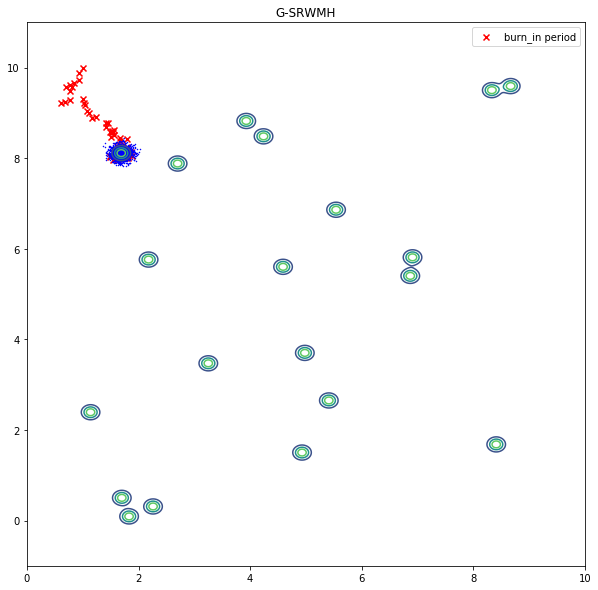

In [556]:
l_1, acc_1 =g_srwmh(1,10,0.01,mu,NIter)
burn_in = 60 # Burn-in time 
plt.figure(figsize=(10,10))
p = plt.scatter(l_1[:burn_in,0], l_1[:burn_in,1], color='r',marker = 'x');
plt.scatter(l_1[burn_in:,0],l_1[burn_in:,1], color='b',s=1,lw=0.5);
plt.contour(X,Y,Z,levels); 
plt.legend([p],['burn_in period']);
plt.title('G-SRWMH');
print "Acceptance rate is {0}".format(acc_1)

#### Zoom over the sampling region:  

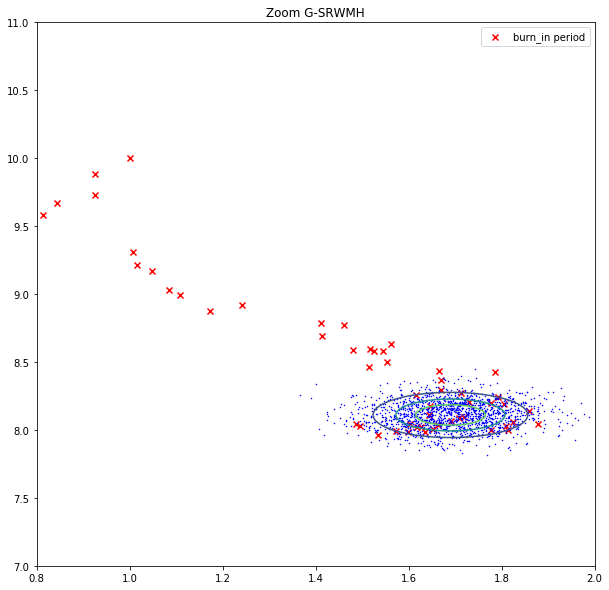

In [557]:
plt.figure(figsize=(10,10))
p = plt.scatter(l_1[:burn_in,0], l_1[:burn_in,1], color='r',marker = 'x');
plt.scatter(l_1[burn_in:,0],l_1[burn_in:,1], color='b',s=1,lw=0.5);
plt.contour(X,Y,Z,levels); 
plt.xlim(0.8,2)
plt.ylim(7,11)
plt.legend([p],['burn_in period']);
plt.title('Zoom G-SRWMH');

### Second Example:

Acceptance rate is 0.582333333333


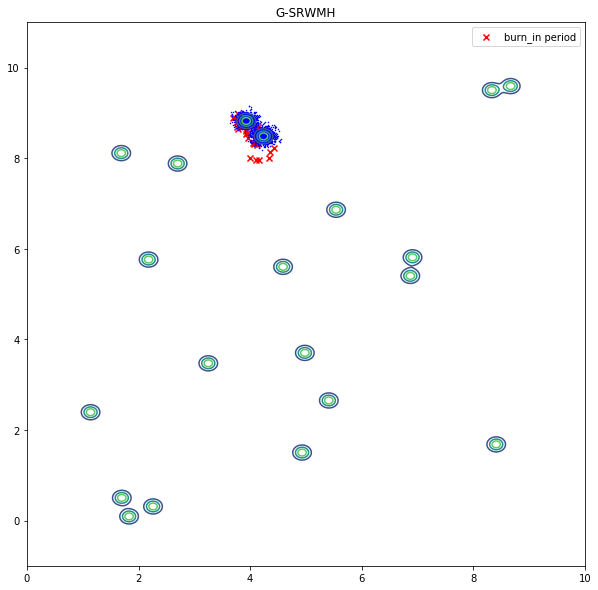

In [558]:
l_2, acc_2 =g_srwmh(4,8,0.01,mu,NIter)
burn_in = 60 # Burn-in time 
plt.figure(figsize=(10,10))
p = plt.scatter(l_2[:burn_in,0], l_2[:burn_in,1], color='r',marker = 'x');
plt.scatter(l_2[burn_in:,0],l_2[burn_in:,1], color='b',s=1,lw=0.5);
plt.contour(X,Y,Z,levels); 
plt.legend([p],['burn_in period']);
plt.title('G-SRWMH');
print "Acceptance rate is {0}".format(acc_2)

#### Zoom over the sampling region 

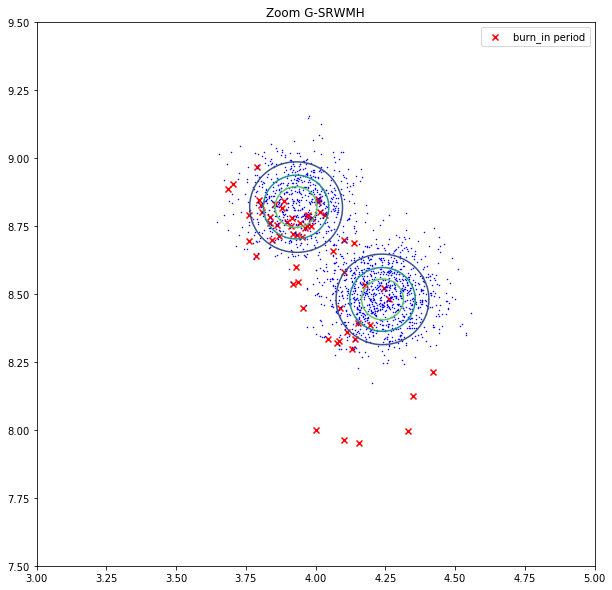

In [559]:
plt.figure(figsize=(10,10))
p = plt.scatter(l_2[:burn_in,0], l_2[:burn_in,1], color='r',marker = 'x');
plt.scatter(l_2[burn_in:,0],l_2[burn_in:,1], color='b',s=1,lw=0.5);
plt.xlim(3,5)
plt.ylim(7.5,9.5)
plt.contour(X,Y,Z,levels); 
plt.legend([p],['burn_in period']);
plt.title('Zoom G-SRWMH');

### Third Example: 

Acceptance rate is 0.596333333333


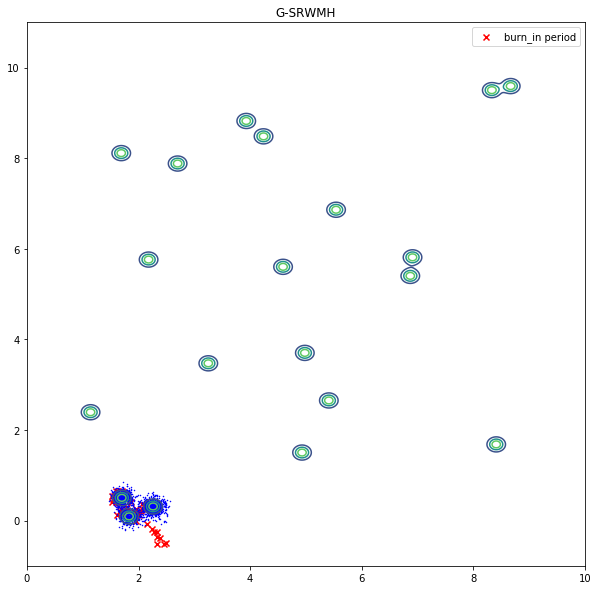

In [560]:
l_3, acc_3 =g_srwmh(2.5,-0.5,0.01,mu,NIter)
burn_in = 60 # Burn-in time 
plt.figure(figsize=(10,10))
p = plt.scatter(l_3[:burn_in,0], l_3[:burn_in,1], color='r',marker = 'x');
plt.scatter(l_3[burn_in:,0],l_3[burn_in:,1], color='b',s=1,lw=0.5);
plt.contour(X,Y,Z,levels); 
plt.legend([p],['burn_in period']);
plt.title('G-SRWMH');
print "Acceptance rate is {0}".format(acc_3)

#### Zoom over the sampling region: 

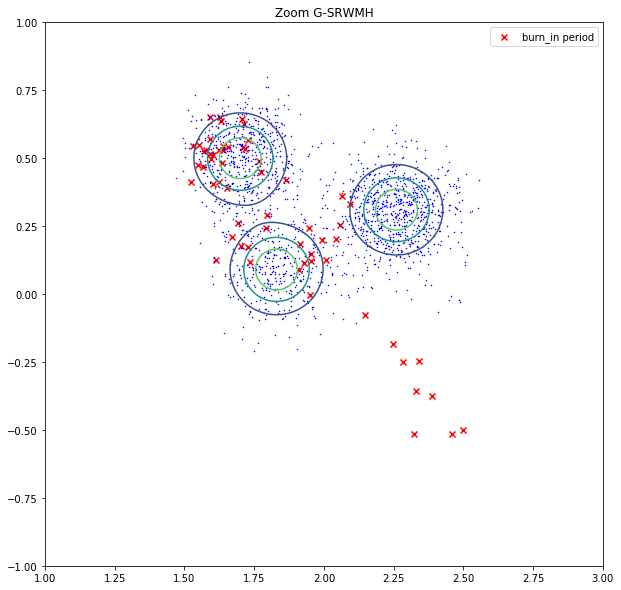

In [561]:
plt.figure(figsize=(10,10))
p = plt.scatter(l_3[:burn_in,0], l_3[:burn_in,1], color='r',marker = 'x');
plt.scatter(l_3[burn_in:,0],l_3[burn_in:,1], color='b',s=1,lw=0.5);
plt.xlim(1,3)
plt.ylim(-1,1)
plt.contour(X,Y,Z,levels); 
plt.legend([p],['burn_in period']);
plt.title('Zoom G-SRWMH');

### Conclusion: 
When the distribution is multimodal, the symetric random walk Metropolis-Hasting algorithm does not explore all the modes. It stays on one or two, up to three modes if they are close to each other. 
Therefore, the MH algorithm fails to sample the target distribution $\pi$.

# Exercice 2: Parallel Tempering: 

In [767]:
## Define parameters of the Parallel Tempering algorithm 
#K = 5
T = np.array([60,21.6,7.7, 2.8, 1])
tau = 0.25 * np.sqrt(T)
sigma = tau**2
NIter = 5000

#### Plots of the target of the tempered distributions

In [575]:
## Define the meshgrid 
xlist = np.linspace(0,10,1000)
ylist = np.linspace(-1,11,1000)
X,Y = np.meshgrid(xlist, ylist)
## Define the levels 
levels = np.arange(0,1,0.2)

In [576]:
Z = np.zeros((X.shape[0],X.shape[1],2))
Z[:,:,0] = X
Z[:,:,1] = Y
## Compute the value of the tempered Target distribution on the grid
Z = target_pi(Z,mu)
Z_1 = Z**(1/T[1])
Z_2 = Z**(1/T[2])
Z_3 = Z**(1/T[3])
Z_4 = Z**(1/T[4])

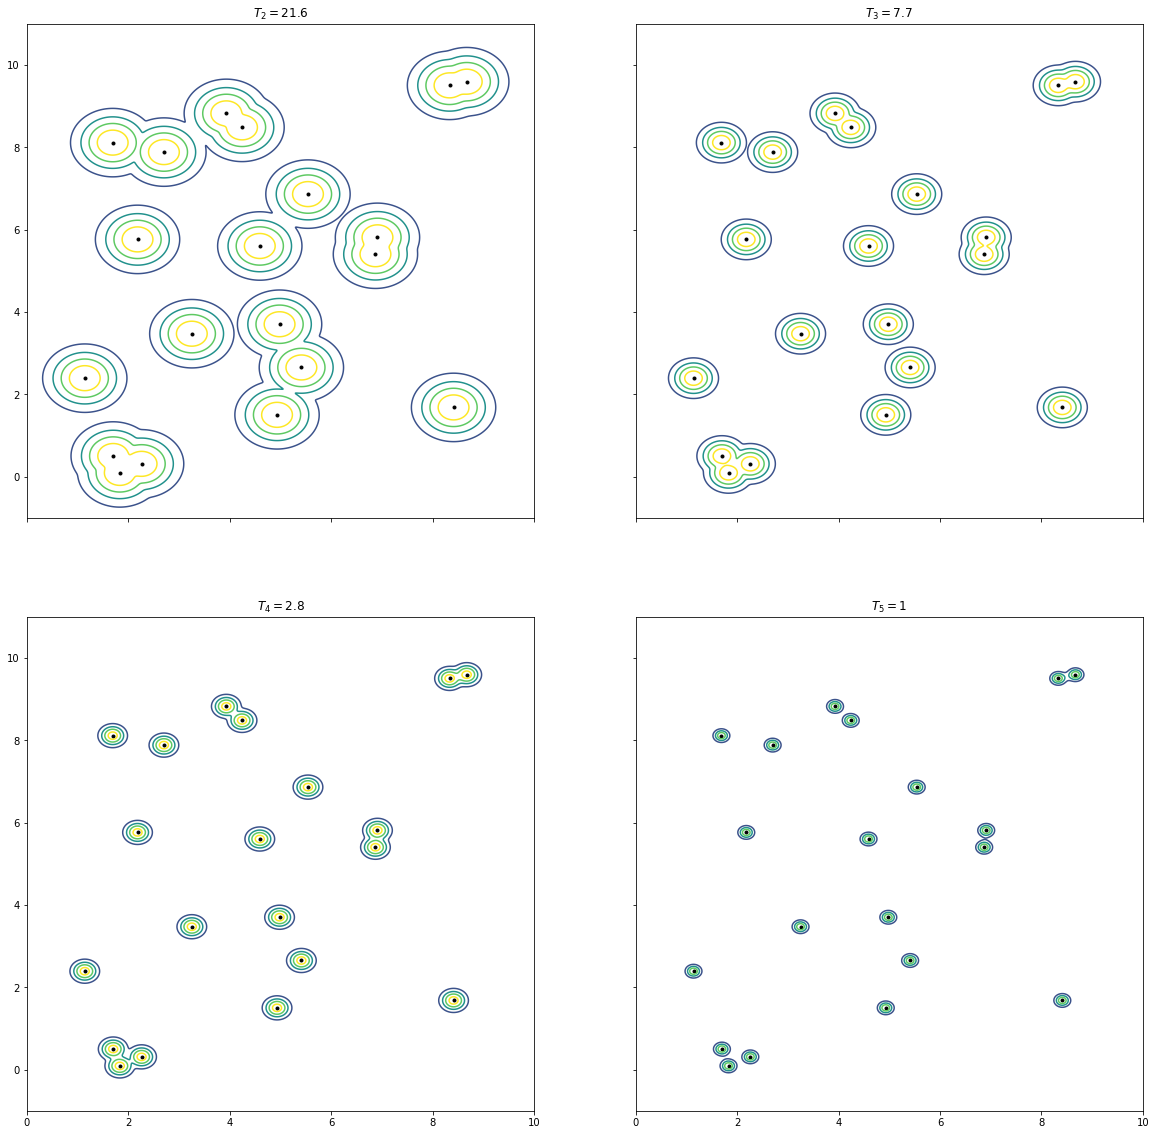

In [639]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 20));
ax1.contour(X, Y, Z_1,levels);
ax1.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
ax1.set_title('$T_2 = 21.6$');
ax1.axis([0,10,-1,11]);
ax2.contour(X, Y, Z_2,levels);
ax2.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
ax2.set_title('$T_3 = 7.7$');
ax3.contour(X, Y, Z_3,levels);
ax3.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
ax3.set_title('$T_4 = 2.8$');
ax4.contour(X, Y, Z_4,levels);
ax4.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
ax4.set_title('$T_5 = 1$');

#### Implementation of the Parallel Tempering algorithm: 

In [771]:
def pt_g_srwmh(x_0,y_0,T,sigma,mu,NIter): 
    """
        T     : Stock the temperatures of the tempered distributions 
        sigma   : Stock the variances of the proposal gaussian kernel
                for each chain, define the covariance matrix = sigma[i] * Id 
        mu    : is the centroids of the gaussians defining the gaussian mixture
        NIter : is the number of iteration 
    """ 
    ## Number of chains 
    K = len(T)
    ## Store the number of swaps
    swap = [0] * K  
    ## Stock the acceptance in each chain 
    acc  = [0] * K
    ## l[k] store the points for chain k 
    l = list([[x_0,y_0]] * K )
    Id = np.eye(2)
    for t in range(NIter): 
        for k in range(K): 
            # In each chain, run the MH algorithm with a G-SRW Kernel proposal
            l_temp,c  = g_srwmh(l[k][-2],l[k][-1],sigma[k],mu, NIter=1 ,T =  T[k])# Only need one iteration of a MH algorithm
            l[k] = l[k] + list(l_temp[-1]) 
            acc[k] += c 
        ## Choose uniformly two different integers from [0,K-1] 
        i,j = np.random.choice(K, 2, replace=False)
        ## Compute the swap Acceptance probability: 
        alpha = min([1, np.divide( target_pi([l[j][-2],l[j][-1]],mu,T[i]) * target_pi([l[i][-2],l[i][-1]],mu,T[j]), 
                                  target_pi([l[i][-2],l[i][-1]],mu,T[i]) * target_pi([l[j][-2],l[j][-1]],mu,T[j]) )])
        u = np.random.uniform(0,1)
        if alpha > u : # We swap 
            l[i][-2:],l[j][-2:] = l[j][-2:],l[i][-2:]
            swap[i] += 1 
            swap[j] += 1
            # print "Swap : {0} <--> {1}".format(i,j)
        if t%500 == 499: 
            print "[INFO] Chain step {0} completed".format(t+1)
            print "[INFO] Number of swaps performed: {0}".format(swap)
    # Output a vector of points for each chain 
    num_point = len(l[0]) / 2 
    Z_pt = np.zeros([K,num_point,2])
    for k in range(K):
        l_temp = np.array(l[k])
        Z_pt[k] = l_temp.reshape((num_point,2))
    print "[INFO] Total Number of swaps performed: {0}".format(swap)
    print "[INFO] Total Number of rejection is: {0}".format(acc)
    return Z_pt, acc, swap

In [772]:
Z_pt,acc,swap = pt_g_srwmh(0,1,T,sigma,mu,NIter);

[INFO] Chain step 500 completed
[INFO] Number of swaps performed: [157, 181, 172, 165, 151]
[INFO] Chain step 1000 completed
[INFO] Number of swaps performed: [326, 342, 345, 346, 301]
[INFO] Chain step 1500 completed
[INFO] Number of swaps performed: [515, 495, 527, 532, 463]
[INFO] Chain step 2000 completed
[INFO] Number of swaps performed: [685, 689, 695, 723, 640]
[INFO] Chain step 2500 completed
[INFO] Number of swaps performed: [856, 874, 863, 917, 794]
[INFO] Chain step 3000 completed
[INFO] Number of swaps performed: [1016, 1054, 1039, 1102, 967]
[INFO] Chain step 3500 completed
[INFO] Number of swaps performed: [1173, 1238, 1210, 1279, 1140]
[INFO] Chain step 4000 completed
[INFO] Number of swaps performed: [1338, 1420, 1390, 1465, 1281]
[INFO] Chain step 4500 completed
[INFO] Number of swaps performed: [1518, 1598, 1571, 1631, 1432]
[INFO] Chain step 5000 completed
[INFO] Number of swaps performed: [1693, 1777, 1729, 1801, 1594]
[INFO] Total Number of swaps performed: [1693, 

#### Plot the sampling for different tempered distribution 

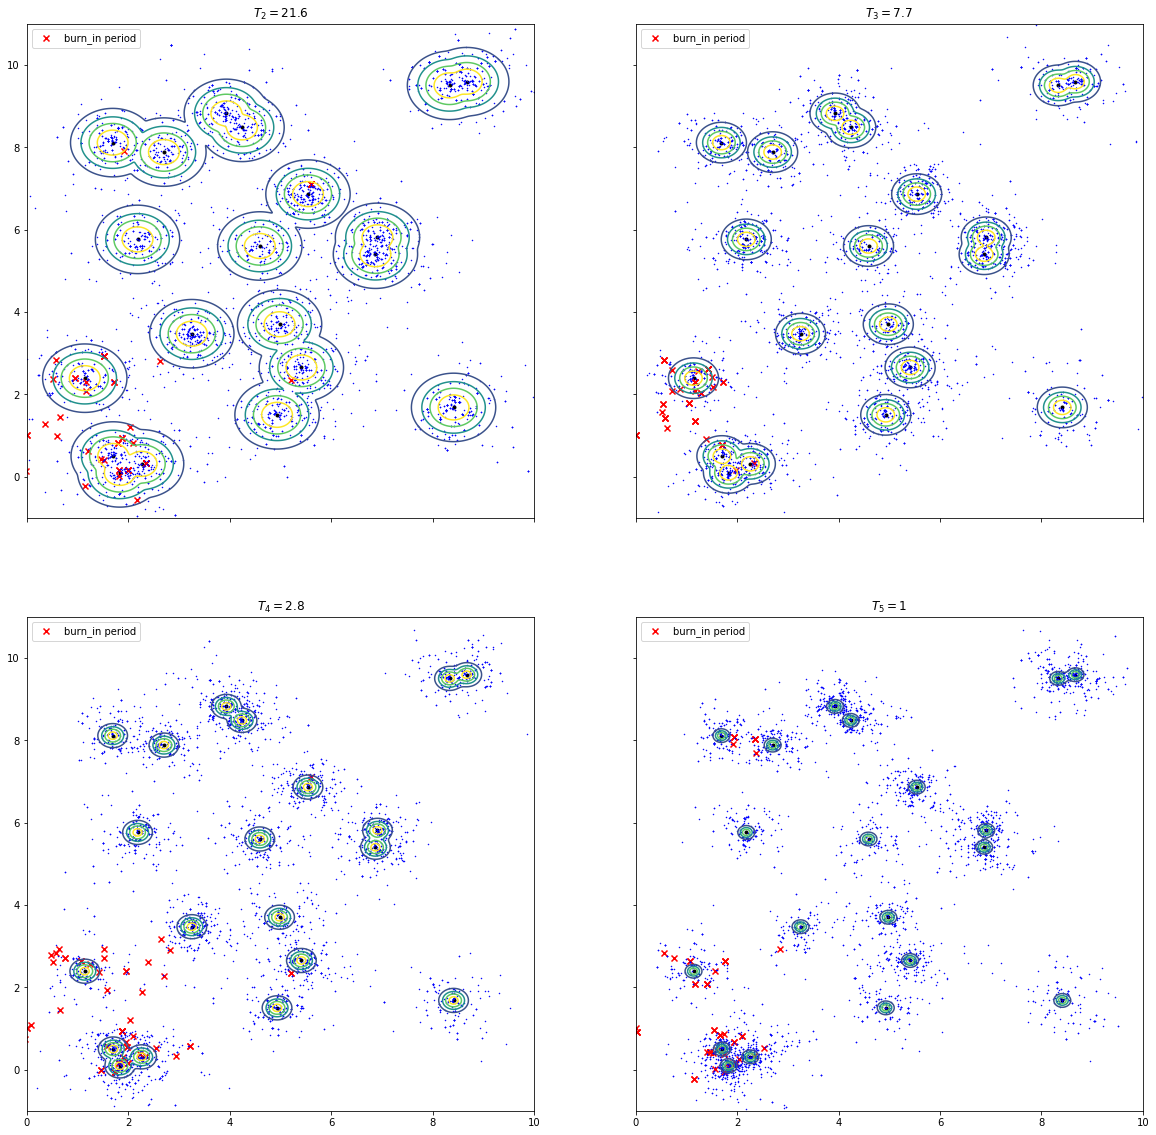

In [773]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 20));
ax1.contour(X, Y, Z_1,levels);
ax1.scatter(mu[:,0],mu[:,1], marker='.',color='black');
p = ax1.scatter(Z_pt[1][:burn_in,0], Z_pt[1][:burn_in,1], color='r',marker = 'x');
ax1.scatter(Z_pt[1][burn_in:,0],Z_pt[1][burn_in:,1], color='b',s=1,lw=0.5);
ax1.legend([p],['burn_in period']);
ax1.set_title('$T_2 = 21.6$');
ax1.axis([0,10,-1,11]);

ax2.contour(X, Y, Z_2,levels);
ax2.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax2.scatter(Z_pt[2][:burn_in,0], Z_pt[2][:burn_in,1], color='r',marker = 'x');
ax2.scatter(Z_pt[2][burn_in:,0],Z_pt[2][burn_in:,1], color='b',s=1,lw=0.5);
ax2.legend([p],['burn_in period']);
ax2.set_title('$T_3 = 7.7$');
ax2.axis([0,10,-1,11]);


ax3.contour(X, Y, Z_3,levels);
ax3.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax3.scatter(Z_pt[3][:burn_in,0], Z_pt[3][:burn_in,1], color='r',marker = 'x');
ax3.scatter(Z_pt[3][burn_in:,0],Z_pt[3][burn_in:,1], color='b',s=1,lw=0.5);
ax3.legend([p],['burn_in period']);
ax3.set_title('$T_4 = 2.8$');
ax3.axis([0,10,-1,11]);


ax4.contour(X, Y, Z_4,levels);
ax4.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax4.scatter(Z_pt[4][:burn_in,0], Z_pt[4][:burn_in,1], color='r',marker = 'x');
ax4.scatter(Z_pt[4][burn_in:,0],Z_pt[4][burn_in:,1], color='b',s=1,lw=0.5);
ax4.legend([p],['burn_in period']);
ax4.set_title('$T_5 = 1$');
ax4.axis([0,10,-1,11]);


### Conclusion: 
The Parallel Tempering has a computational cost of running parallel simulations, but the algorithm achieve an improvement in the mixing property of the set of the Monte Carlo simulations by reaching high and low energies.

# Exercice 3: Equi-Energie Sampler

In [762]:
## Define parameters of the Equi-Energy Sampler algorithm 
#K = 5
T = np.array([60,21.6,7.7, 2.8, 1])
tau = 0.25 * np.sqrt(T)
sigma = tau**2
Xi = np.exp( [-63.2,-20,-6.3,-2 ])
NIter = 5000
eps = 0.1

In [677]:
def get_dom(x,Xi): 
    # Helper function to get the energy domain of the value x between 0 and S-1
    res = 0 
    while  x > Xi[res] : 
        res += 1 
        if res == len(Xi) - 1 and x > Xi[res] :
            res+= 1 
            break 
    return res

In [798]:
def uniform_choose_ind_in_dom(l,s): 
    # Helper function to choose an indice from l in domain s with s in 0..S-1
    indices = [ i for i in range(len(l)) if l[i]==s]
    if len(indices) == 0 : 
        return np.random.choice(len(l))
    return np.random.choice(indices)

In [799]:
def ees_g_srwmh(x_0,y_0,T,sigma,Xi,eps,mu,NIter): 
    """
        T     : Stock the temperatures of the tempered distributions
        sigma : Stock the variances of the proposal gaussian kernel 
                    for each chain, define the covariance matrix = sigma[i] * Id 
        Xi    : Stock the energy levels in an increasing way
        eps   : Is the probability of choosing from the past or from a MH algorithm
        mu    : is the centroids of the gaussians defining the gaussian mixture
        NIter : is the number of iteration 
    """ 
    ## Number of chains 
    K = len(T)
    ## Number of enery domains: 
    #S = len(Xi) + 1  
    ## Stock the acceptance in each chain 
    acc  = [0] * K
    ## l[k] store the points for chain k 
    l = list([[x_0,y_0]] * K )
    
    ## ind[k] store the domain of each state of the MC at each step
    ind = list([[0]] * K )
    for k in range(K): 
        # Get the domain of the initial point for each tempered distribution
        ind[k][0] = get_dom( target_pi(  [x_0,y_0]  , mu ,  T[k]  )  ,  Xi )
        
    Id = np.eye(2)
    ## Begin the iteration : 
    for t in range(NIter): 
        ## k = 0 We sample using a G-SRW MH algorithm
        l_0,_ = g_srwmh(l[0][-2],l[0][-1],sigma[0],mu, NIter=1 ,T =  T[0])# Only need one iteration of a MH algorithm
        l[0] = l[0] + list(l_0[-1])
        ind[0] = ind[0] + [ get_dom( target_pi(  [ l[0][-2] , l[0][-1] ] , mu , T[0] )  ,  Xi ) ] 
        
        ## Begin equi-energy sampling algorithm
        for k in range(1,K):  
            u = np.random.uniform(0,1)
            # In each chain, 
            if u < eps : #with probability eps we choose from previous chain 
                # Get the domain of the current state 
                s = get_dom( target_pi(  [ l[k][-2] , l[k][-1] ] , mu , T[k] ) ,Xi)
                # Choose uniformly a point in the same domain from the previous chain 
                i = uniform_choose_ind_in_dom(ind[k-1],s);
                l_previous = [ l[k-1][2*i] , l[k-1][2*i+1] ] 
                l_current = [ l[k][-2] , l[k][-1] ] 
                # Compute the acceptance probability of selecting from the past of the previous chain 
                alpha = min([1, np.divide( target_pi( l_previous ,mu,T[k]) * target_pi(l_current,mu,T[k-1]), 
                                  target_pi(l_previous,mu,T[k-1]) * target_pi(l_current,mu,T[k]) )])
                r = np.random.uniform(0,1)
                if alpha > u : # We select from the past of the previous chain
                    l[k] = l[k] + l_previous
                else : # We reject the proposal 
                    l[k] = l[k] + l_current
            else: # And with probability 1-eps, we run the G-SRW MH algorithm
                l_mh,_ =g_srwmh(l[k][-2],l[k][-1],sigma[k],mu, NIter=1 ,T =  T[k])# Only need one iteration of a MH algorithm
                l[k] = l[k] + list(l_mh[-1]) 
            ## Add the domain of the choosen sample to the list 
            ind[k] = ind[k] + [ get_dom( target_pi(  [ l[k][-2] , l[k][-1] ] , mu , T[k] )  ,  Xi ) ]
            
        if t%500 == 499: 
            print "[INFO] Chain step {0} completed".format(t+1)
            #print "[INFO] Number of swaps performed: {0}".format(swap)
    # Output a vector of points for each chain 
    num_point = len(l[0]) / 2 
    Z_ees = np.zeros([K,num_point,2])
    for k in range(K):
        l_temp = np.array(l[k])
        Z_ees[k] = l_temp.reshape((num_point,2))
    #print "[INFO] Total Number of swaps performed: {0}".format(swap)
    #print "[INFO] Total Number of rejection is: {0}".format(acc)
    return Z_ees, ind

### Case $\epsilon = 0.1$

In [801]:
Z_ees,ind = ees_g_srwmh(0,1,T,sigma,Xi,eps,mu,NIter)

[INFO] Chain step 500 completed
[INFO] Chain step 1000 completed
[INFO] Chain step 1500 completed
[INFO] Chain step 2000 completed
[INFO] Chain step 2500 completed
[INFO] Chain step 3000 completed
[INFO] Chain step 3500 completed
[INFO] Chain step 4000 completed
[INFO] Chain step 4500 completed
[INFO] Chain step 5000 completed


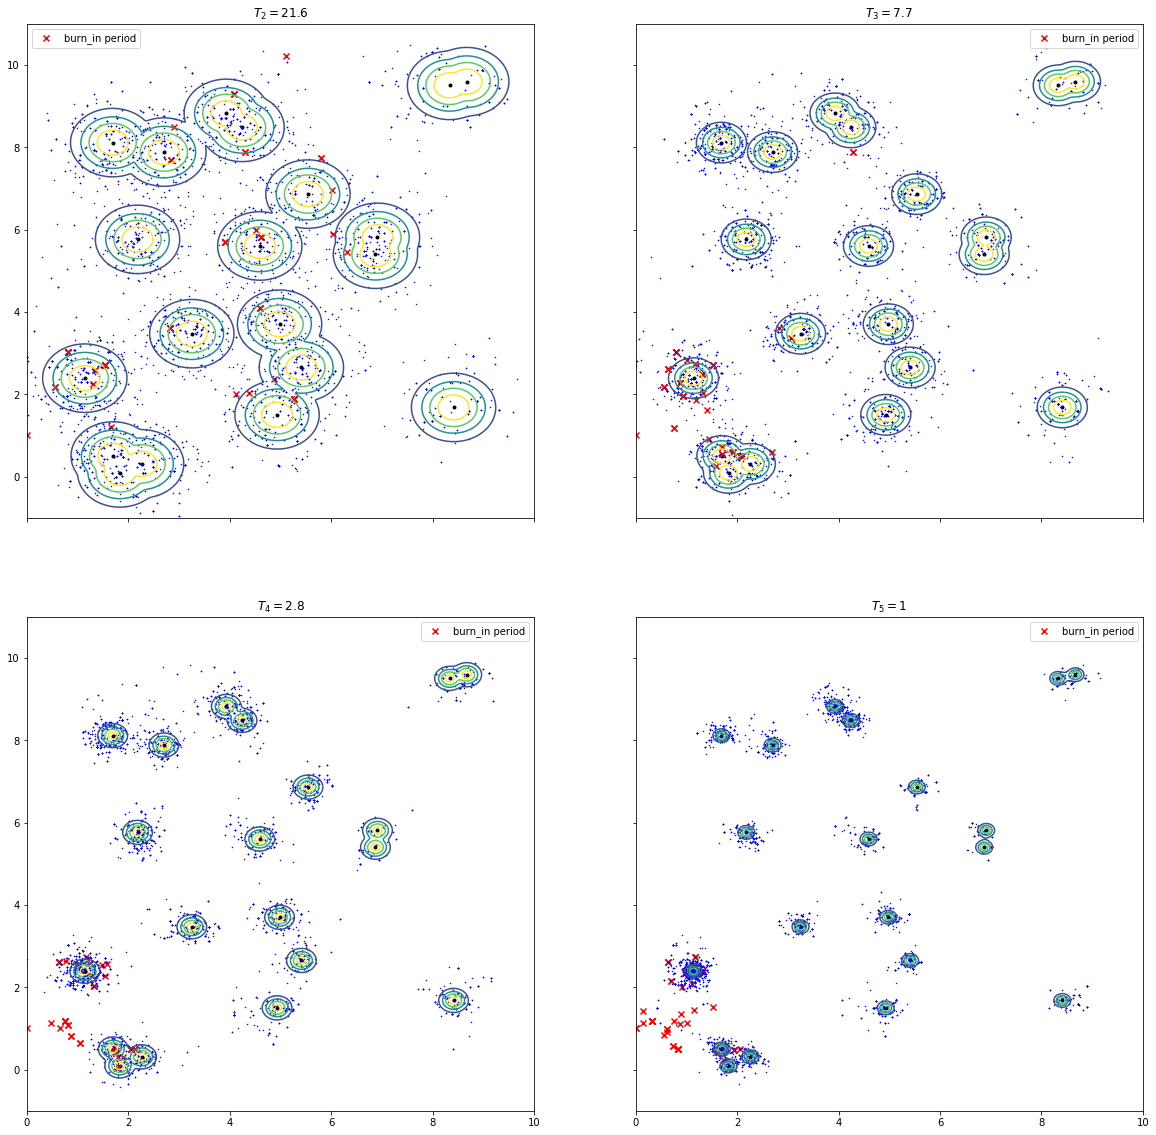

In [766]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 20));
ax1.contour(X, Y, Z_1,levels);
ax1.scatter(mu[:,0],mu[:,1], marker='.',color='black');
p = ax1.scatter(Z_ees[1][:burn_in,0], Z_ees[1][:burn_in,1], color='r',marker = 'x');
ax1.scatter(Z_ees[1][burn_in:,0],Z_ees[1][burn_in:,1], color='b',s=1,lw=0.5);
ax1.legend([p],['burn_in period']);
ax1.set_title('$T_2 = 21.6$');
ax1.axis([0,10,-1,11]);

ax2.contour(X, Y, Z_2,levels);
ax2.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax2.scatter(Z_ees[2][:burn_in,0], Z_ees[2][:burn_in,1], color='r',marker = 'x');
ax2.scatter(Z_ees[2][burn_in:,0],Z_ees[2][burn_in:,1], color='b',s=1,lw=0.5);
ax2.legend([p],['burn_in period']);
ax2.set_title('$T_3 = 7.7$');
ax2.axis([0,10,-1,11]);


ax3.contour(X, Y, Z_3,levels);
ax3.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax3.scatter(Z_ees[3][:burn_in,0], Z_ees[3][:burn_in,1], color='r',marker = 'x');
ax3.scatter(Z_ees[3][burn_in:,0],Z_ees[3][burn_in:,1], color='b',s=1,lw=0.5);
ax3.legend([p],['burn_in period']);
ax3.set_title('$T_4 = 2.8$');
ax3.axis([0,10,-1,11]);


ax4.contour(X, Y, Z_4,levels);
ax4.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax4.scatter(Z_ees[4][:burn_in,0], Z_ees[4][:burn_in,1], color='r',marker = 'x');
ax4.scatter(Z_ees[4][burn_in:,0],Z_ees[4][burn_in:,1], color='b',s=1,lw=0.5);
ax4.legend([p],['burn_in period']);
ax4.set_title('$T_5 = 1$');
ax4.axis([0,10,-1,11]);


### Case $\epsilon = 0.3$

In [819]:
eps = 0.3
Z_ees_2,ind_2 = ees_g_srwmh(0,1,T,sigma,Xi,eps,mu,NIter)

[INFO] Chain step 500 completed
[INFO] Chain step 1000 completed
[INFO] Chain step 1500 completed
[INFO] Chain step 2000 completed
[INFO] Chain step 2500 completed
[INFO] Chain step 3000 completed
[INFO] Chain step 3500 completed
[INFO] Chain step 4000 completed
[INFO] Chain step 4500 completed
[INFO] Chain step 5000 completed


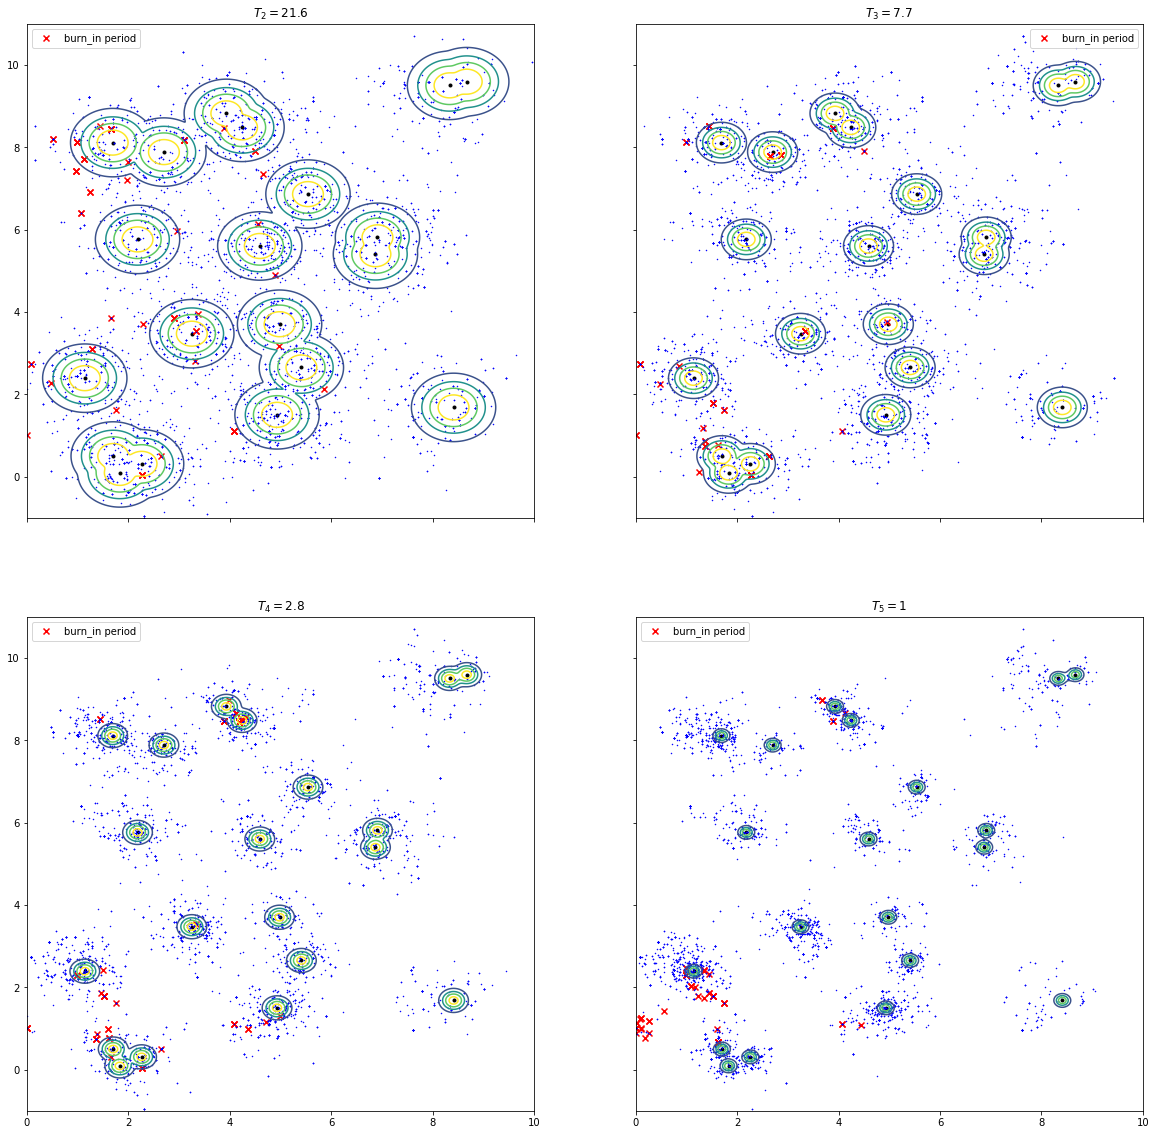

In [820]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 20));
ax1.contour(X, Y, Z_1,levels);
ax1.scatter(mu[:,0],mu[:,1], marker='.',color='black');
p = ax1.scatter(Z_ees_2[1][:burn_in,0], Z_ees_2[1][:burn_in,1], color='r',marker = 'x');
ax1.scatter(Z_ees_2[1][burn_in:,0],Z_ees_2[1][burn_in:,1], color='b',s=1,lw=0.5);
ax1.legend([p],['burn_in period']);
ax1.set_title('$T_2 = 21.6$');
ax1.axis([0,10,-1,11]);

ax2.contour(X, Y, Z_2,levels);
ax2.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax2.scatter(Z_ees_2[2][:burn_in,0], Z_ees_2[2][:burn_in,1], color='r',marker = 'x');
ax2.scatter(Z_ees_2[2][burn_in:,0],Z_ees_2[2][burn_in:,1], color='b',s=1,lw=0.5);
ax2.legend([p],['burn_in period']);
ax2.set_title('$T_3 = 7.7$');
ax2.axis([0,10,-1,11]);


ax3.contour(X, Y, Z_3,levels);
ax3.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax3.scatter(Z_ees_2[3][:burn_in,0], Z_ees_2[3][:burn_in,1], color='r',marker = 'x');
ax3.scatter(Z_ees_2[3][burn_in:,0],Z_ees_2[3][burn_in:,1], color='b',s=1,lw=0.5);
ax3.legend([p],['burn_in period']);
ax3.set_title('$T_4 = 2.8$');
ax3.axis([0,10,-1,11]);


ax4.contour(X, Y, Z_4,levels);
ax4.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax4.scatter(Z_ees_2[4][:burn_in,0], Z_ees_2[4][:burn_in,1], color='r',marker = 'x');
ax4.scatter(Z_ees_2[4][burn_in:,0],Z_ees_2[4][burn_in:,1], color='b',s=1,lw=0.5);
ax4.legend([p],['burn_in period']);
ax4.set_title('$T_5 = 1$');
ax4.axis([0,10,-1,11]);


### Case $\epsilon = 0.5$

In [811]:
eps = 0.5
Z_ees_3,ind_3 = ees_g_srwmh(0,1,T,sigma,Xi,eps,mu,NIter)

[INFO] Chain step 500 completed
[INFO] Chain step 1000 completed
[INFO] Chain step 1500 completed
[INFO] Chain step 2000 completed
[INFO] Chain step 2500 completed
[INFO] Chain step 3000 completed
[INFO] Chain step 3500 completed
[INFO] Chain step 4000 completed
[INFO] Chain step 4500 completed
[INFO] Chain step 5000 completed


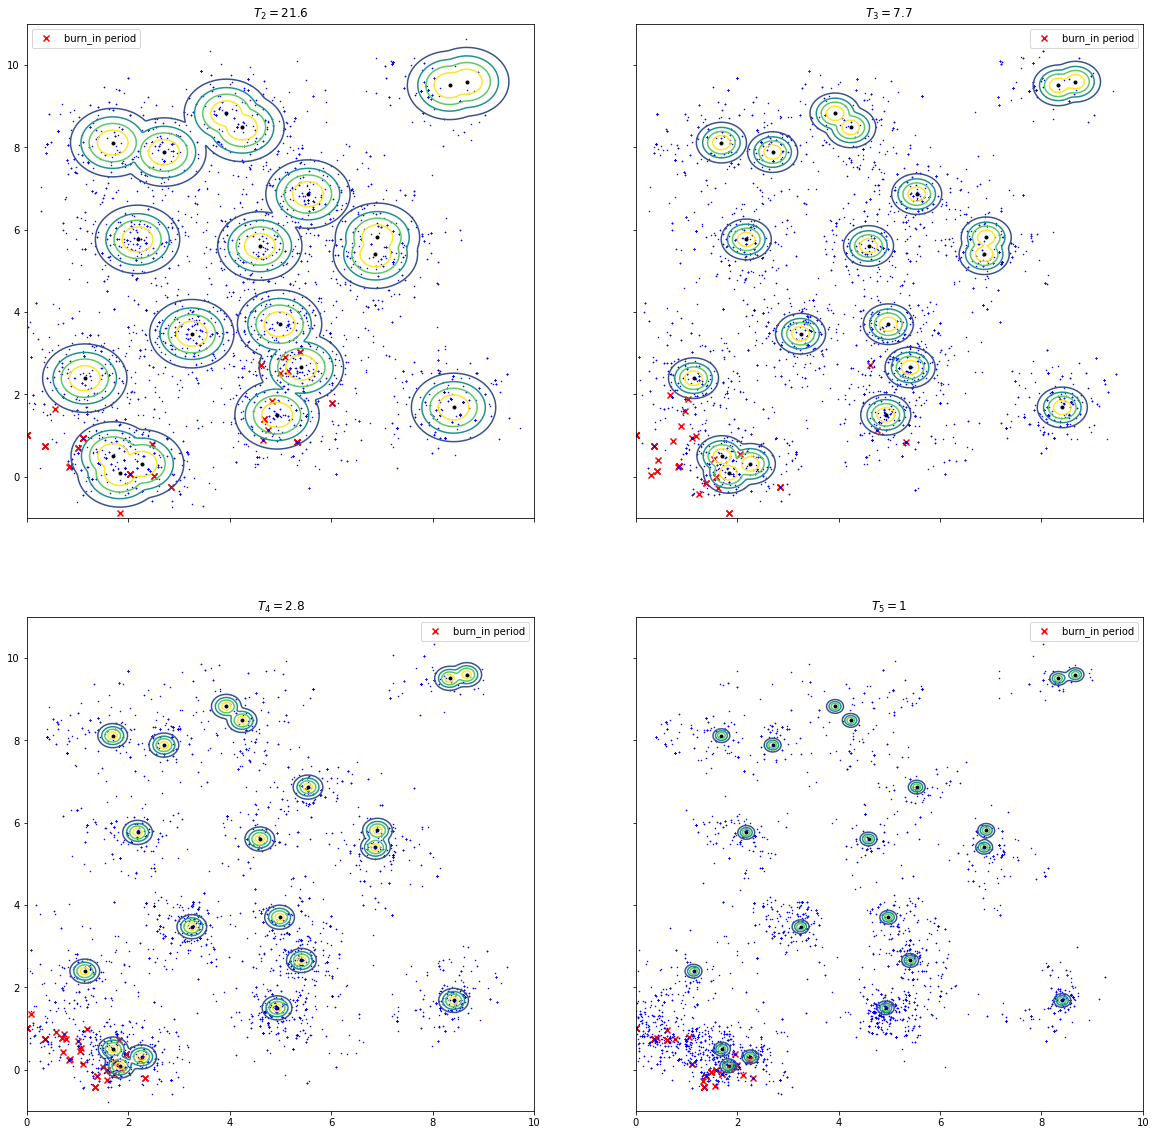

In [812]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 20));
ax1.contour(X, Y, Z_1,levels);
ax1.scatter(mu[:,0],mu[:,1], marker='.',color='black');
p = ax1.scatter(Z_ees_3[1][:burn_in,0], Z_ees_3[1][:burn_in,1], color='r',marker = 'x');
ax1.scatter(Z_ees_3[1][burn_in:,0],Z_ees_3[1][burn_in:,1], color='b',s=1,lw=0.5);
ax1.legend([p],['burn_in period']);
ax1.set_title('$T_2 = 21.6$');
ax1.axis([0,10,-1,11]);

ax2.contour(X, Y, Z_2,levels);
ax2.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax2.scatter(Z_ees_3[2][:burn_in,0], Z_ees_3[2][:burn_in,1], color='r',marker = 'x');
ax2.scatter(Z_ees_3[2][burn_in:,0],Z_ees_3[2][burn_in:,1], color='b',s=1,lw=0.5);
ax2.legend([p],['burn_in period']);
ax2.set_title('$T_3 = 7.7$');
ax2.axis([0,10,-1,11]);


ax3.contour(X, Y, Z_3,levels);
ax3.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax3.scatter(Z_ees_3[3][:burn_in,0], Z_ees_3[3][:burn_in,1], color='r',marker = 'x');
ax3.scatter(Z_ees_3[3][burn_in:,0],Z_ees_3[3][burn_in:,1], color='b',s=1,lw=0.5);
ax3.legend([p],['burn_in period']);
ax3.set_title('$T_4 = 2.8$');
ax3.axis([0,10,-1,11]);


ax4.contour(X, Y, Z_4,levels);
ax4.scatter(mu[:,0],mu[:,1], marker='.',color='black') ;
p = ax4.scatter(Z_ees_3[4][:burn_in,0], Z_ees_3[4][:burn_in,1], color='r',marker = 'x');
ax4.scatter(Z_ees_3[4][burn_in:,0],Z_ees_3[4][burn_in:,1], color='b',s=1,lw=0.5);
ax4.legend([p],['burn_in period']);
ax4.set_title('$T_5 = 1$');
ax4.axis([0,10,-1,11]);


### Conclusion :

The Equi-Energy Sampler has a computational cost as the PT algorithm for running K Markov chains in parallel. We notice that as $\epsilon$ increases, the sampler visits more modes. 

## Comparison: 

Both PT and EES algorithms have an important computational cost. We notice that the Parallel Tempering method achieve a similar mixing property of the markov chains as the Equi-Energy Sampler method when $\epsilon$ is near $0.3$. However the PT is more efficient in aiming the modes of the multimodal target distribution in more efficient way.